# Swiggy Restaurant Analysis 

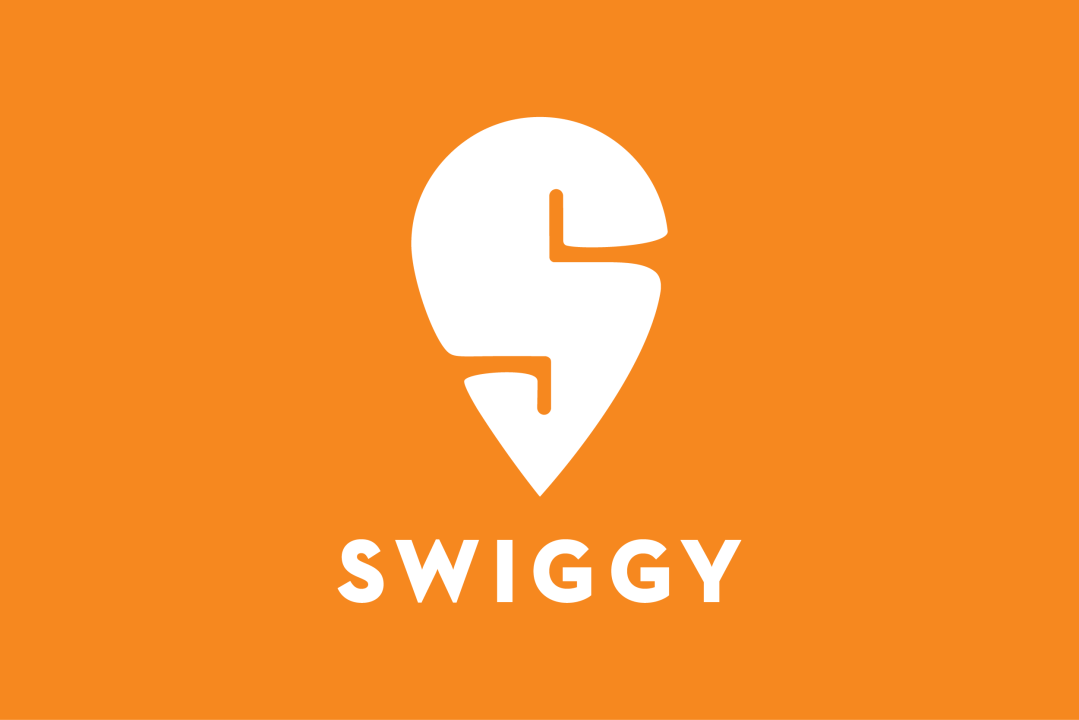

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("swiggy.csv")
data.head().style.set_properties(**{"background-color": "#35A29F","color": "black","border-color": "black"})

In [19]:
data = pd.read_csv("swiggy.csv")
data.head()

ID      Area        City        Restaurant      Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0      4.4       
1  221  Koramangala  Bangalore      Tunday Kababi  300.0      4.1       
2  246    Jogupalya  Bangalore            Kim Lee  650.0      4.4       
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0      3.9       
4  249  Indiranagar  Bangalore                Nh8  350.0      4.0       

   Total ratings  \
0       100        
1       100        
2       100        
3       500        
4        50        

                                 Food type                                  \
0                                Biryani,Chinese,North Indian,South Indian   
1                                                         Mughlai,Lucknowi   
2                                                                  Chinese   
3                                     North Indian,Punjabi,Tandoor,Chinese   
4  Rajasthani,Gujarati,North Indian,Snacks,Desserts,Beverages,Thalis,Chaat   

     Address     Delivery time  
0     5Th Block       59        
1     5Th Block       56        
2   Double Road       50        
3  80 Feet Road       57        
4  80 Feet Road       63

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


In [4]:
num_records = len(data)
num_records

8680

In [5]:
num_columns = len(data.columns)
num_columns

10

In [6]:
data.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [7]:
null_var=data.isnull().sum()/data.shape[0] *100
null_var

ID               0.0
Area             0.0
City             0.0
Restaurant       0.0
Price            0.0
Avg ratings      0.0
Total ratings    0.0
Food type        0.0
Address          0.0
Delivery time    0.0
dtype: float64

In [8]:
data.shape

(8680, 10)

In [9]:
data.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [10]:
data.duplicated().sum()

0

In [11]:
data.nunique()

ID               8680
Area              833
City                9
Restaurant       7865
Price             120
Avg ratings        30
Total ratings       8
Food type        3734
Address          2339
Delivery time      81
dtype: int64

In [20]:
data.describe()

ID           Price     Avg ratings  Total ratings  Delivery time
count    8680.000000  8680.000000  8680.000000   8680.000000    8680.000000 
mean   244812.071429   348.444470     3.655104    156.634793      53.967051 
std    158671.617188   230.940074     0.647629    391.448014      14.292335 
min       211.000000     0.000000     2.000000     20.000000      20.000000 
25%     72664.000000   200.000000     2.900000     50.000000      44.000000 
50%    283442.000000   300.000000     3.900000     80.000000      53.000000 
75%    393425.250000   400.000000     4.200000    100.000000      64.000000 
max    466928.000000  2500.000000     5.000000  10000.000000     109.000000

In [12]:
top_10_areas = data['Area'].value_counts().head(10)
fig = px.bar(top_10_areas, x=top_10_areas.index, y=top_10_areas.values, title='Top 10 Areas with Most Restaurants')

fig.update_xaxes(title_text='Area', title_font_color='white')  
fig.update_yaxes(title_text='Number of Restaurants', title_font_color='white')  

fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white'    
)

fig.show()

In [13]:
popular_food_types = data.groupby(['City', 'Food type'])['ID'].count().reset_index()
popular_food_types = popular_food_types.sort_values(by=['City', 'ID'], ascending=[True, False])
popular_food_types = popular_food_types.drop_duplicates(subset='City')

fig = px.bar(popular_food_types, x='City', y='ID', color='Food type',
             title='Most Popular Food Types Served by Swiggy Restaurants in Each City')

fig.update_xaxes(title_text='City', title_font=dict(color='white'))
fig.update_yaxes(title_text='Number of Restaurants', title_font=dict(color='white'))

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font_color='white',
    title=dict(text='Most Popular Food Types Served by Swiggy Restaurants in Each City', font=dict(color='white'))
)

fig.show()

In [14]:
fig = px.histogram(data, x='Price', title='Distribution of Restaurant Prices on Swiggy')

fig.update_traces(marker_color='red')

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',  
    font_color='white' 
)

fig.show()

<AxesSubplot:>

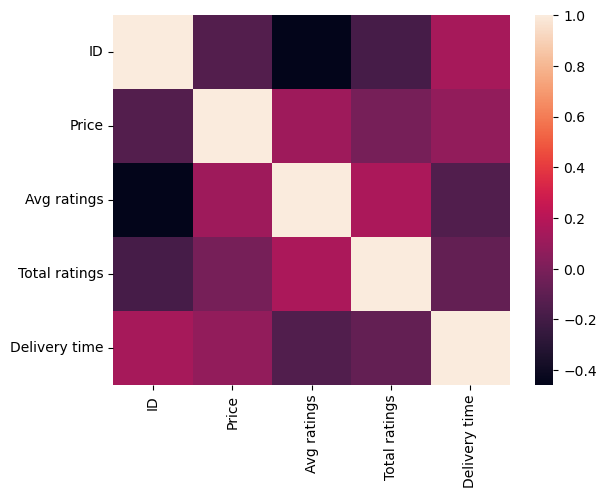

In [15]:
sns.heatmap(data.corr())

Shape of your Data Set loaded: (8680, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    9 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID']

################ Regression problem #####################
To fix data quality issues automatically, import FixDQ from autoviz...
    Alert: Dropping 1 duplicate rows can sometimes cause column data types to change to object. Double-check!


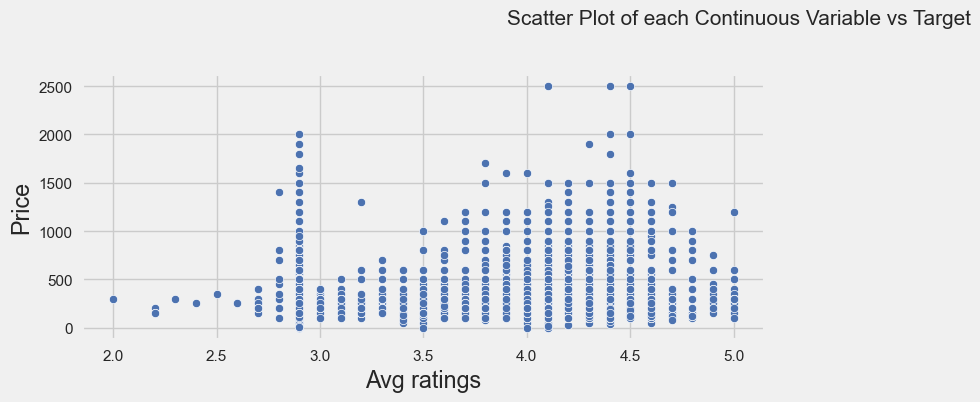

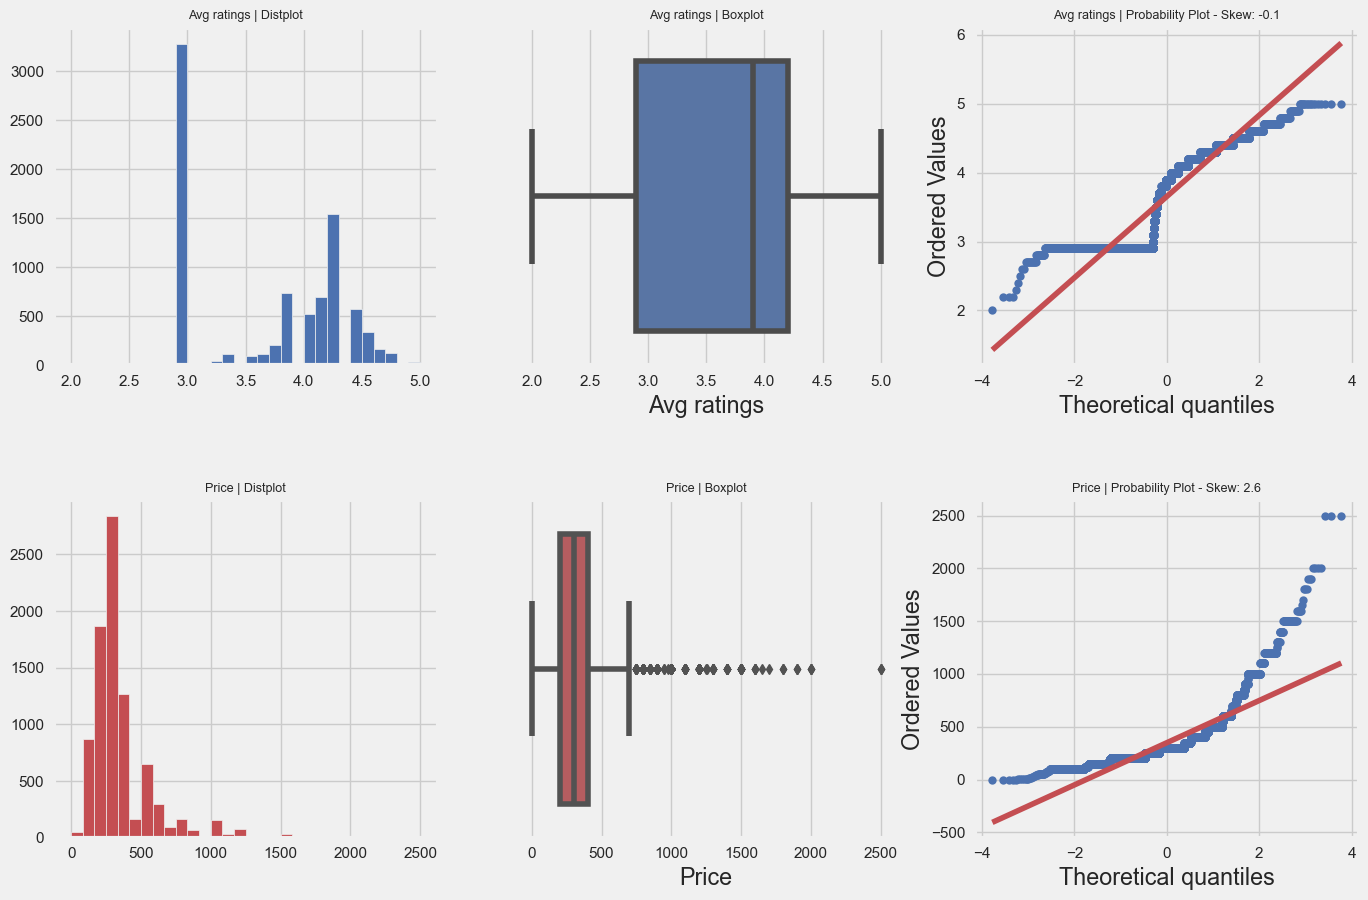

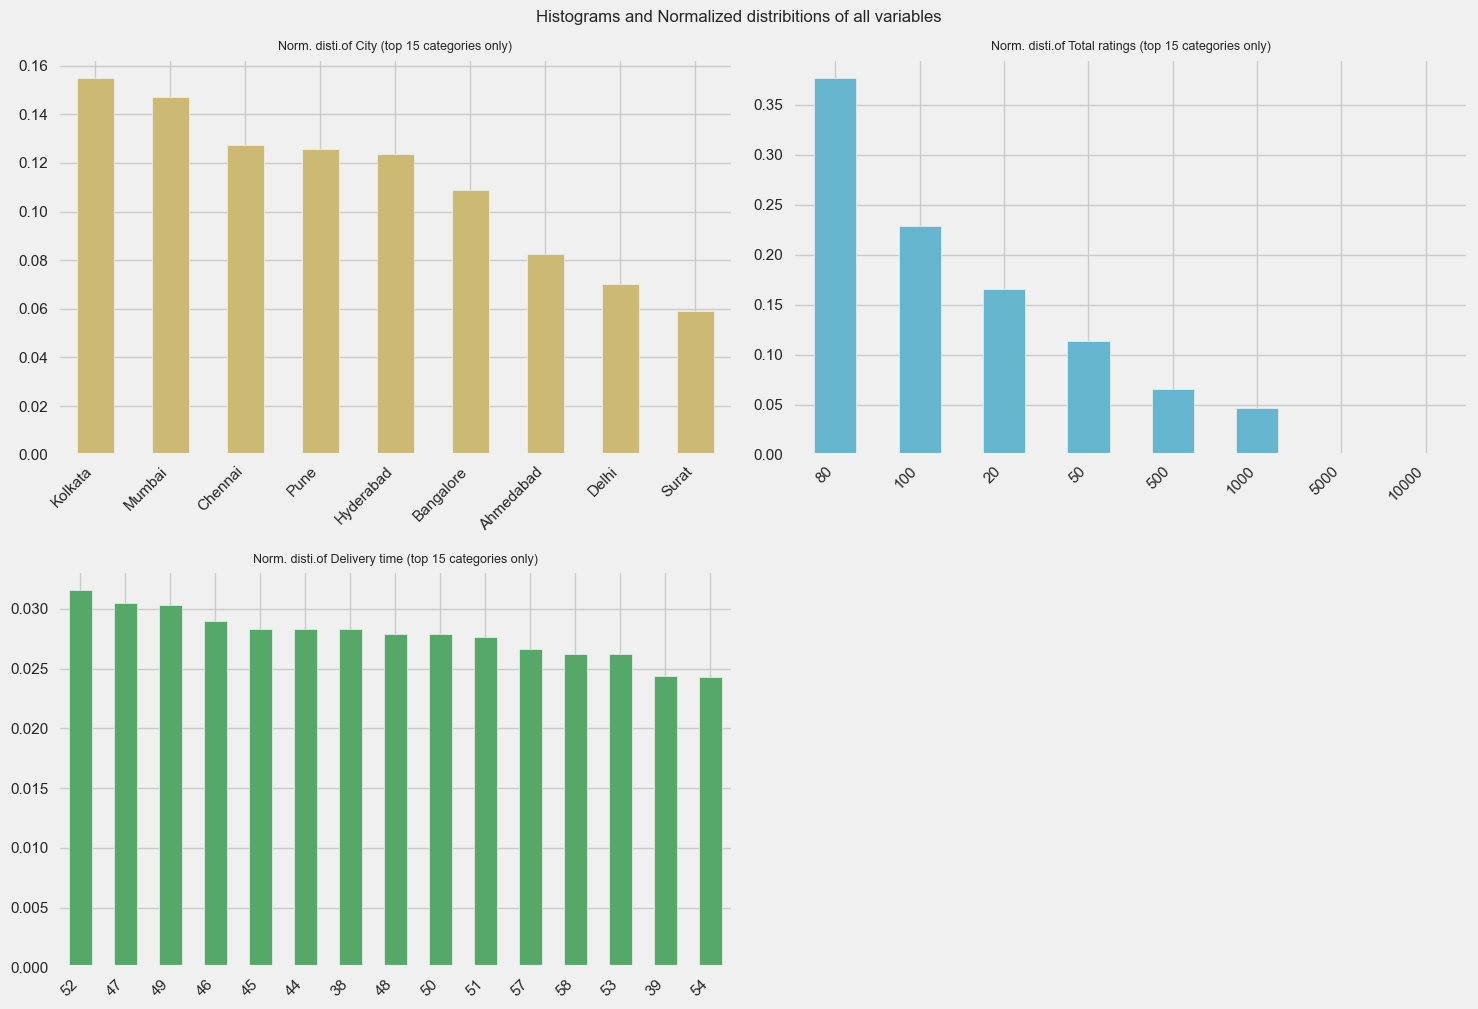

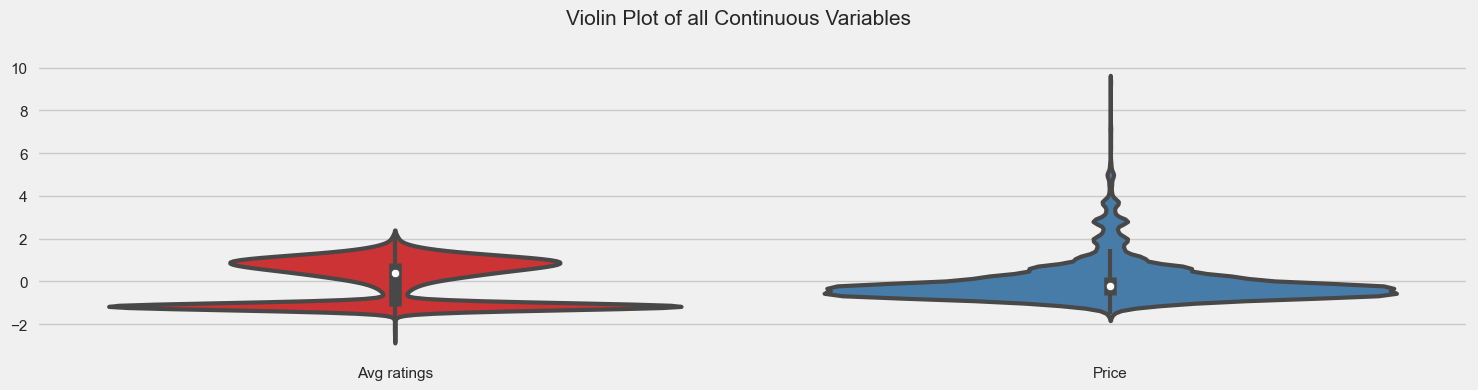

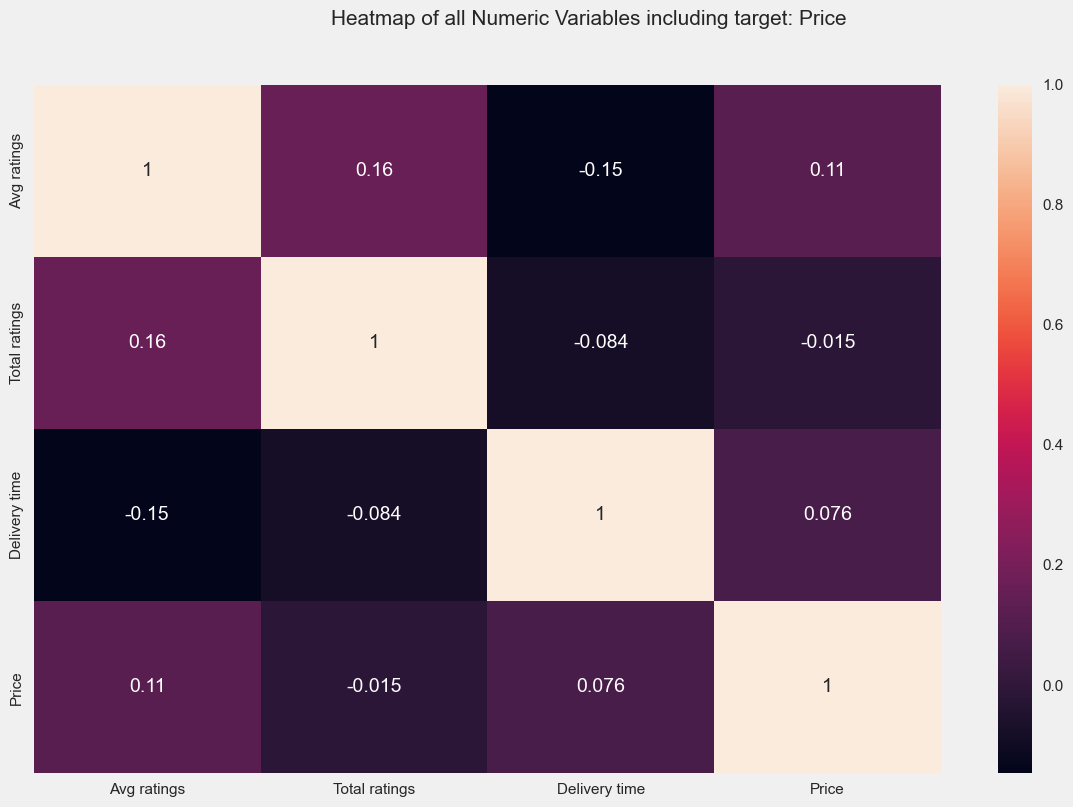

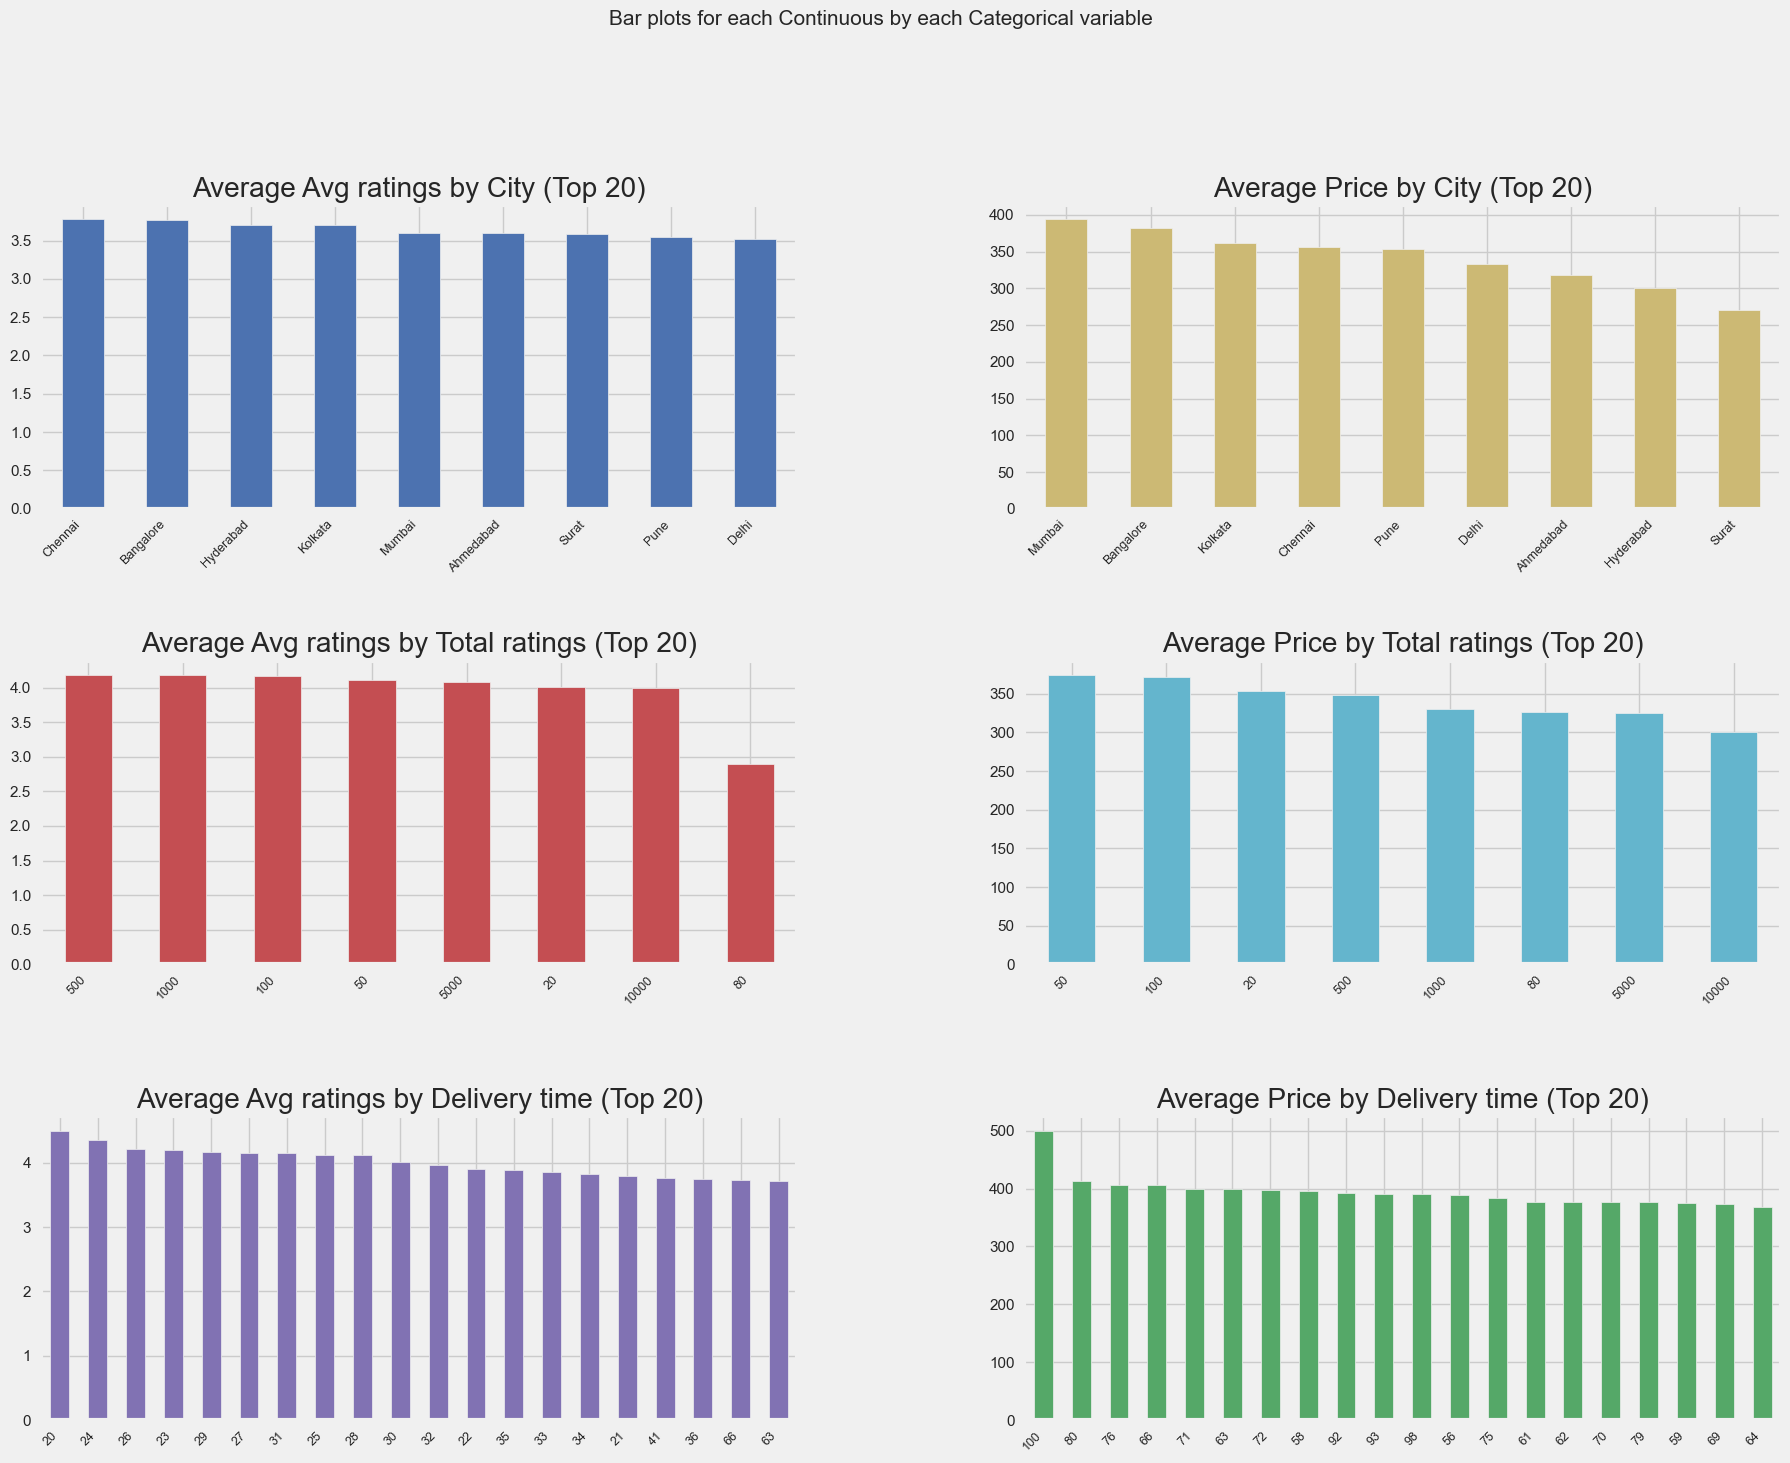

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

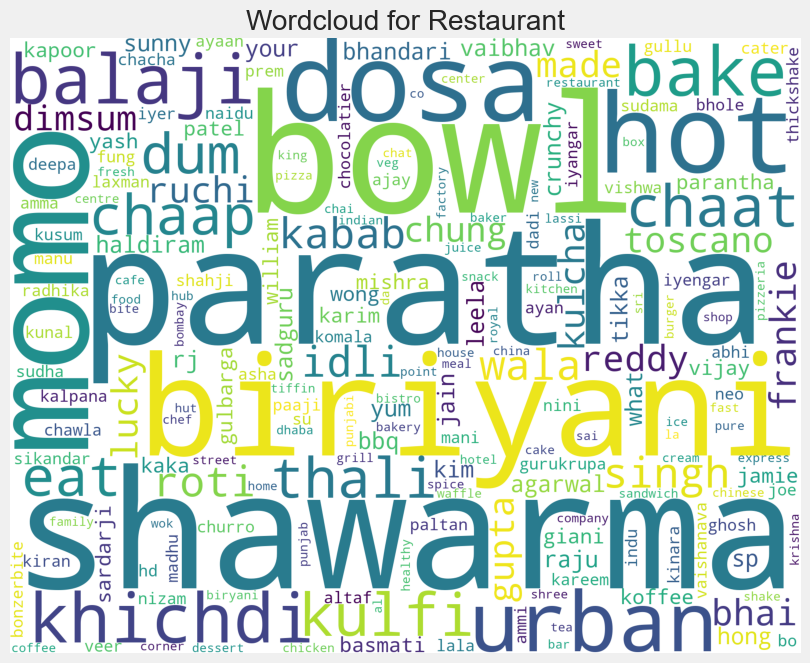

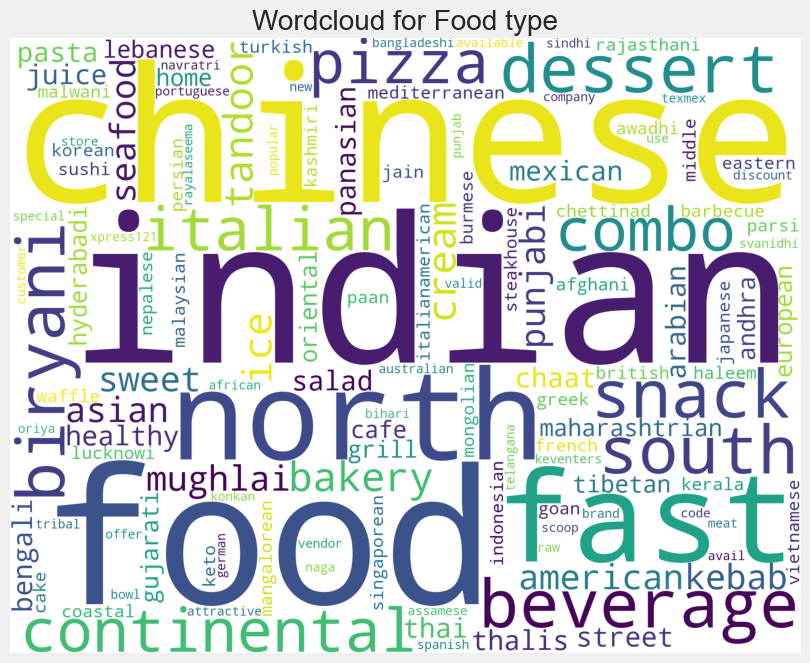

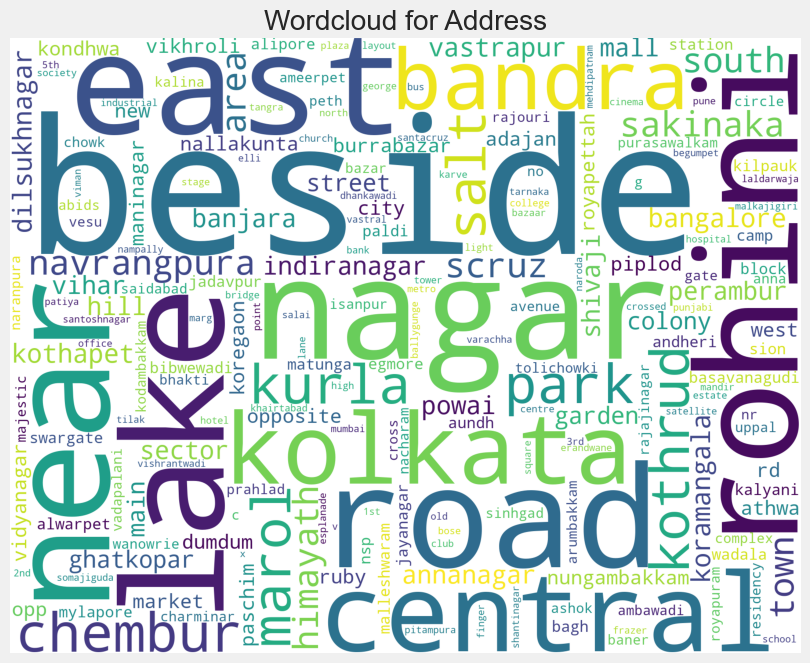

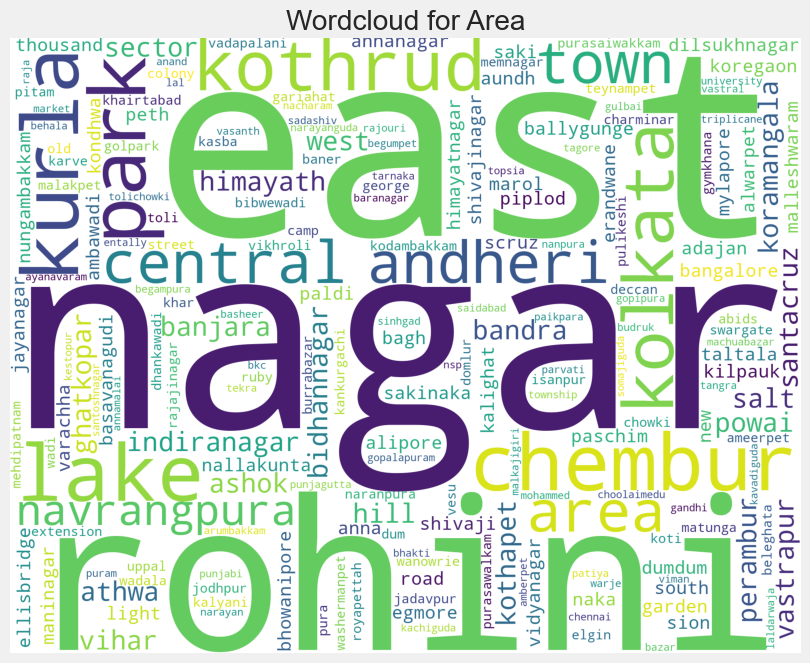

All Plots done
Time to run AutoViz = 59 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [18]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
data = pd.read_csv("swiggy.csv")
data
filename = data
target_variable = "Price"
dft = AV.AutoViz(    
    "swiggy.csv",
    sep=",",
    depVar="Price",
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None)

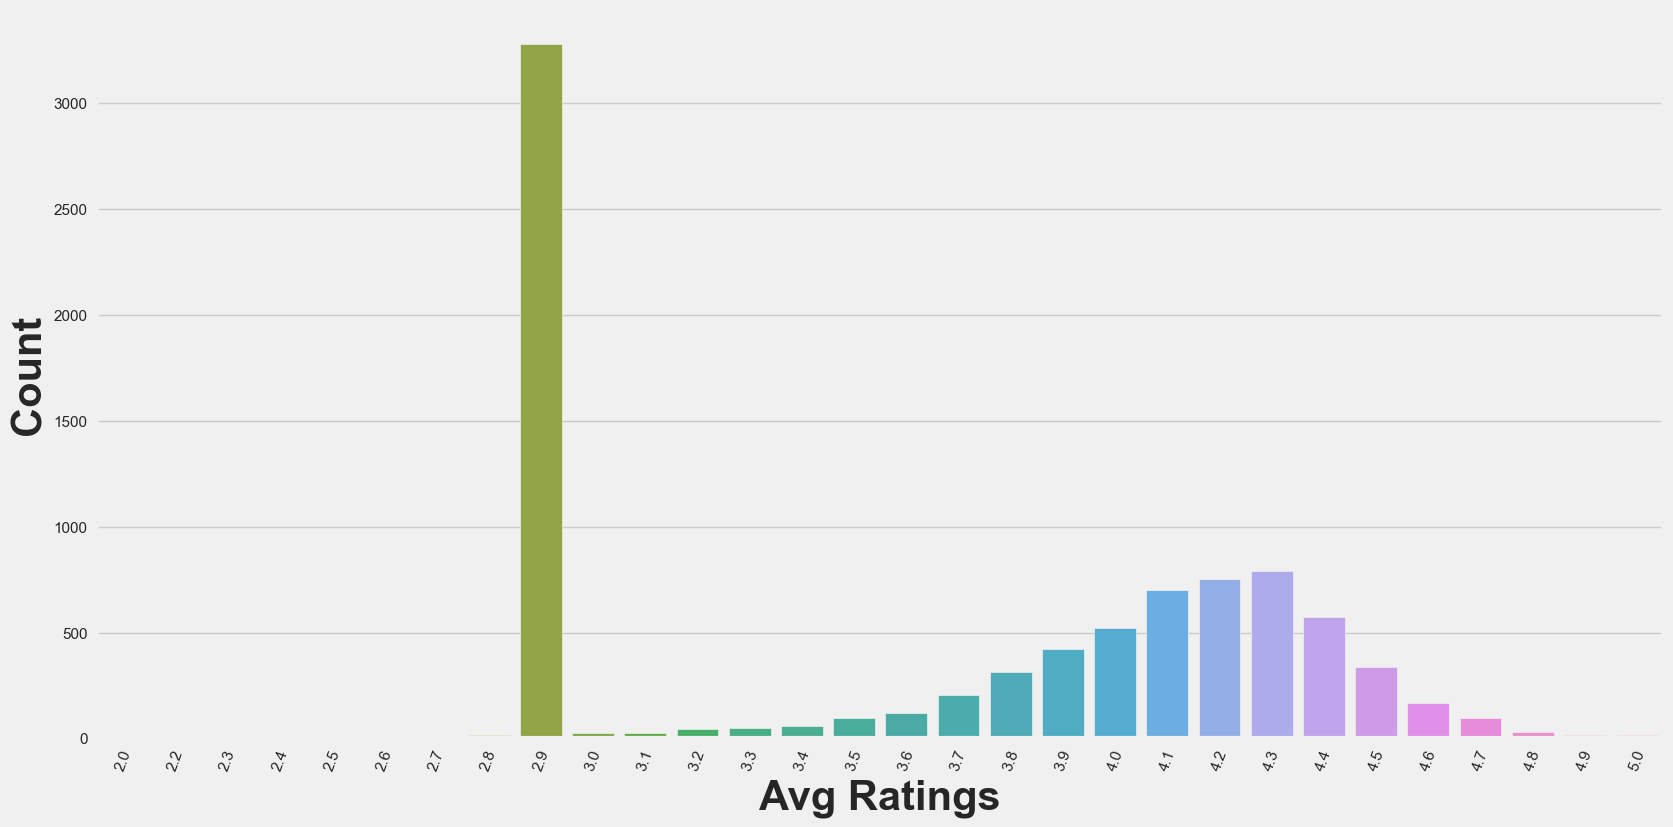

In [21]:
plt.figure(figsize=(18,9))
sns.countplot(data=data,x='Avg ratings')
plt.xticks(rotation=70)
plt.xlabel('Avg Ratings', weight='bold',fontsize=30)
plt.ylabel('Count', weight='bold',fontsize=30)
plt.show()

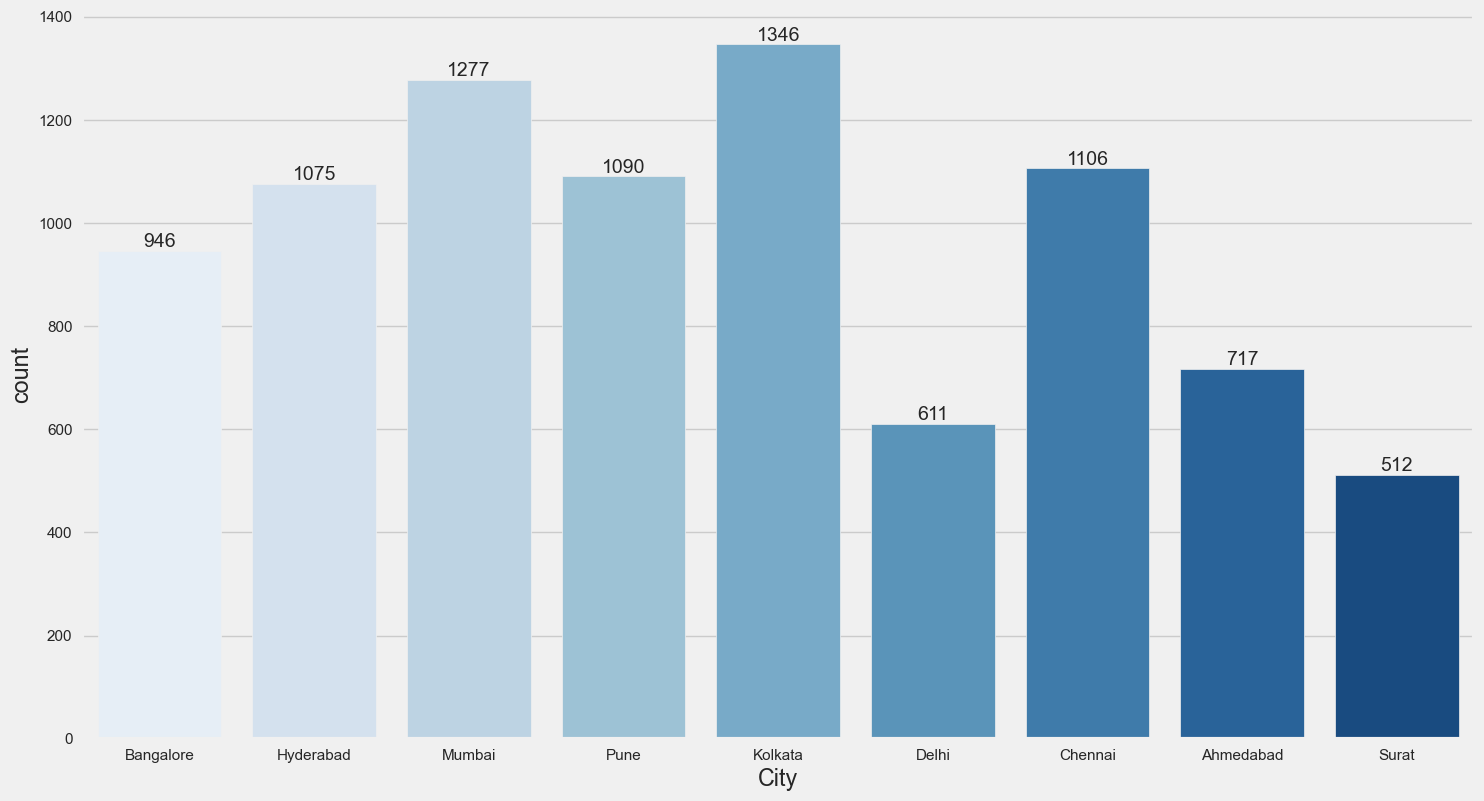

In [22]:
plt.figure(figsize=(16,9))
ax = sns.countplot(data=data, x='City',palette='Blues')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [23]:
data['Price'].max()

2500.0

In [24]:
max_price_data = data[data['Price']==2500.0]

In [25]:
max_price_data.head().style.set_properties(**{"background-color": "#FF8989","color": "black","border-color": "black"})

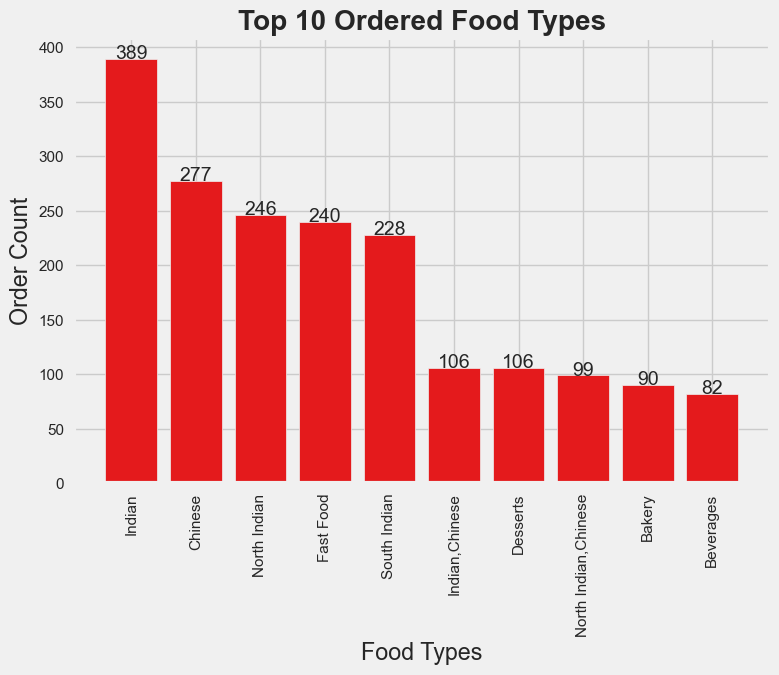

In [26]:
food=data['Food type'].value_counts().head(10)
plt.bar(food.index,food.values)

plt.xticks(rotation='vertical')

for i,v in enumerate(food.values):
    plt.text(i,v+.25,str(v),ha='center')

plt.title('Top 10 Ordered Food Types',fontdict={'fontweight':'bold'})
plt.xlabel("Food Types")
plt.ylabel("Order Count")

plt.show()

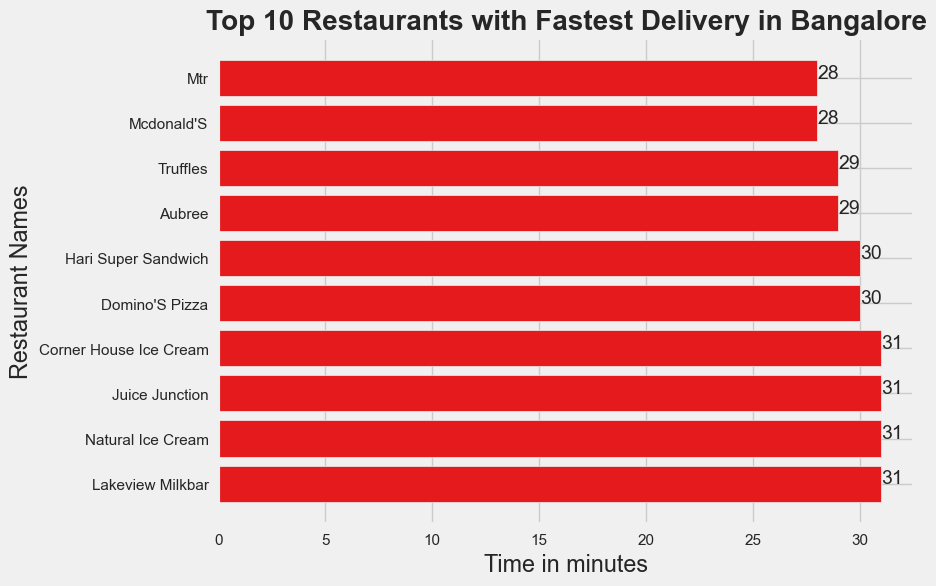

In [27]:
a = data.City == 'Bangalore'
b = data[a]
c =b.sort_values('Delivery time').head(10)

plt.figure(figsize=(8,6))
plt.barh(c.Restaurant[::-1],c['Delivery time'][::-1])
for i,v in enumerate(c['Delivery time'][::-1]):
    plt.text(v,i,str(v))

plt.title('Top 10 Restaurants with Fastest Delivery in Bangalore',fontdict={'fontweight':'bold'})
plt.xlabel('Time in minutes')
plt.ylabel('Restaurant Names')
plt.show()

In [31]:
sorted_data = data.sort_values(by=['City', 'Price'],ascending=[True, False])
sorted_data = sorted_data.iloc[:5, :]
sorted_data.shape

(5, 10)

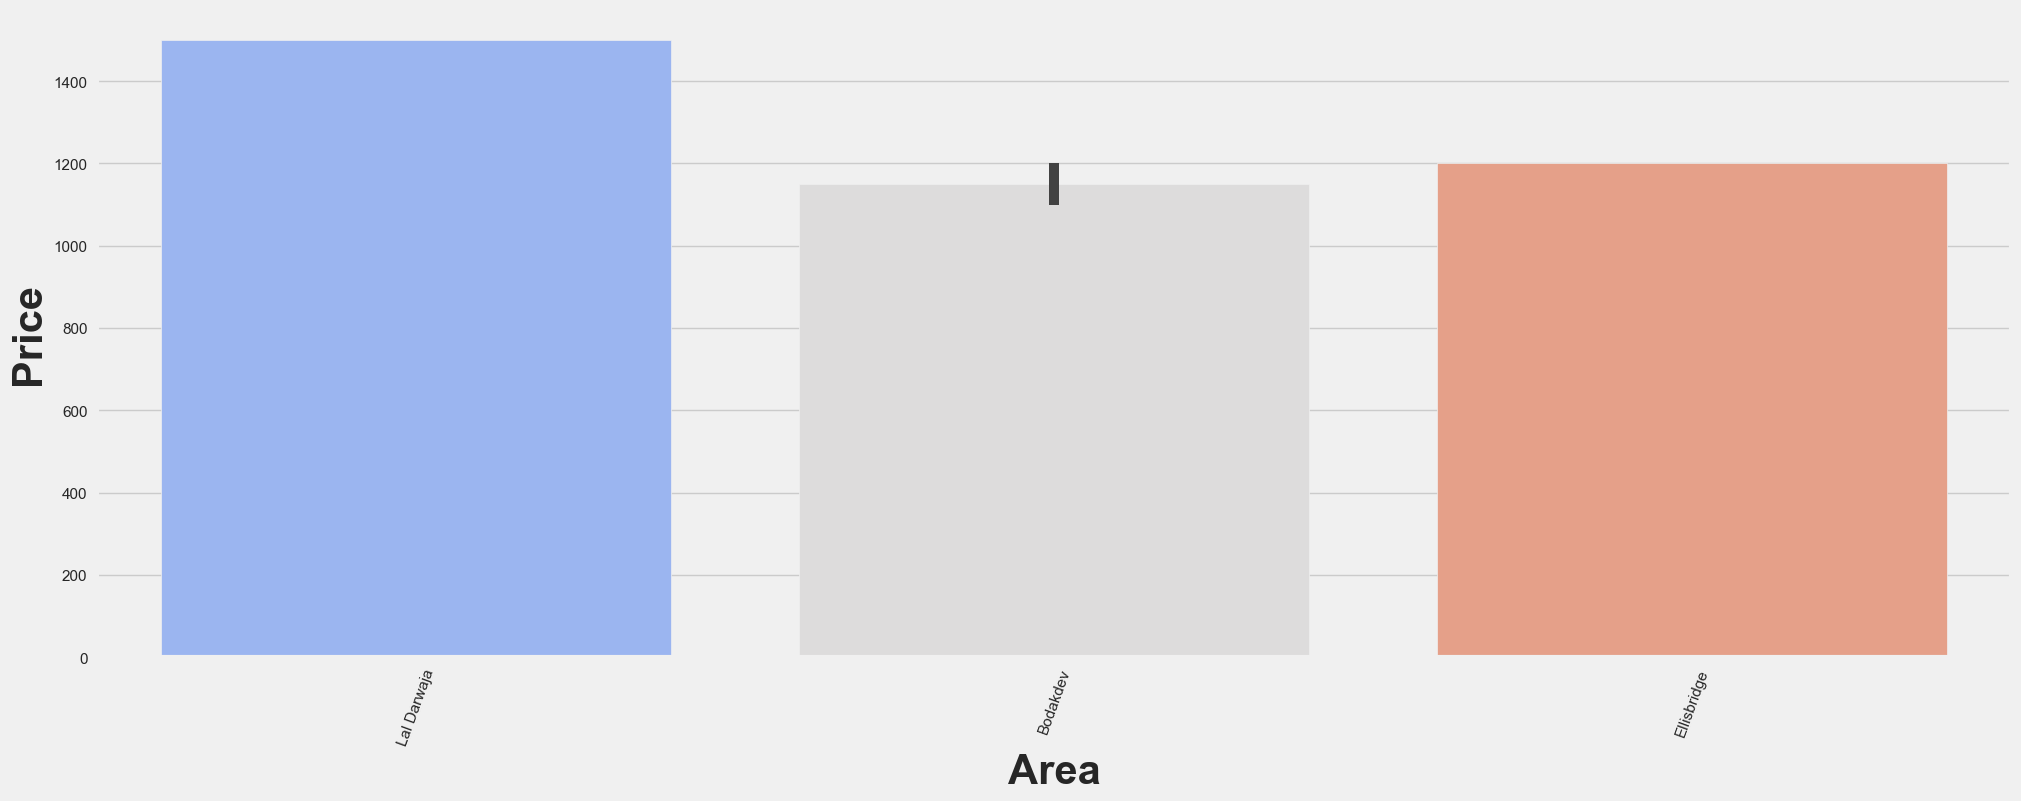

In [32]:
plt.figure(figsize=(22,8))
sns.barplot(x="Area", y="Price",data=sorted_data,palette='coolwarm')
plt.xlabel('Area', weight='bold',fontsize=30)
plt.ylabel('Price', weight='bold',fontsize=30)
plt.xticks(rotation=70)
plt.show()